In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load your dataset (replace 'your_file.csv' with the actual file path)
data = pd.read_csv("webmd.csv")
data.head(2)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724.0,5.0,5.0,I'm a retired physician and of all the meds I ...,5.0,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0.0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724.0,5.0,5.0,cleared me right up even with my throat hurtin...,5.0,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1.0


In [6]:
data.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362804.000000,362804.000000,362804.000000,362804.000000,362804.000000
mean,36878.695171,4.019832,3.532064,3.135409,6.744926
std,52623.769834,1.317710,1.455957,1.611103,9.324257
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [ ]:
import pandas as pd

df = pd.read_csv('webmd.csv')

df['Age'] = df['Age'].astype(str).str.strip() 

# List of columns to check
columns_to_check = ['Drug', 'DrugId']

for col in columns_to_check:
    df[col] = df[col].astype(str).str.strip()

rename_dict = {
    '07-Dec': '7-12',
    '03-Jun': '3-6',

}


df['Age'] = df['Age'].replace(rename_dict)


unwanted_values = rename_dict.keys()
df_cleaned = df[~df['Age'].isin(unwanted_values)]  

df_cleaned = df_cleaned.dropna(subset=['Age'] + columns_to_check) 
df_cleaned = df_cleaned[df_cleaned['Age'] != ''] 

for col in columns_to_check:
    df_cleaned = df_cleaned[~df_cleaned[col].isin(unwanted_values)]


df_cleaned.to_csv('cleaned_webmd.csv', index=False)

print(df_cleaned)


               Age      Condition        Date                          Drug  \
0       75 or over    Stuffy Nose   9/21/2014                  25dph-7.5peh   
1            25-34  Cold Symptoms   1/13/2011                  25dph-7.5peh   
2            65-74          Other   7/16/2012  warfarin (bulk) 100 % powder   
3       75 or over          Other   9/23/2010  warfarin (bulk) 100 % powder   
4            35-44          Other    01-06-09  warfarin (bulk) 100 % powder   
...            ...            ...         ...                           ...   
362801       25-34   Stop Smoking  11/13/2008                       chantix   
362802       55-64   Stop Smoking  11/13/2008                       chantix   
362803       45-54   Stop Smoking    11-12-08                       chantix   
362804         nan            NaN         NaN                           nan   
362805         nan            NaN         NaN                           nan   

          DrugId  EaseofUse  Effectiveness  \
0    

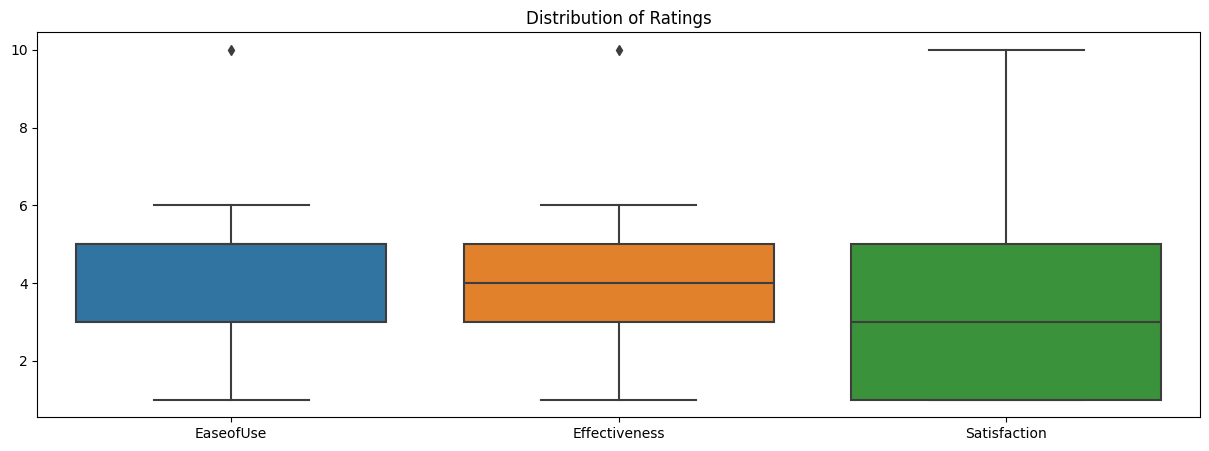

In [59]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df_cleaned[['EaseofUse', 'Effectiveness', 'Satisfaction']])
plt.title('Distribution of Ratings')
plt.show()

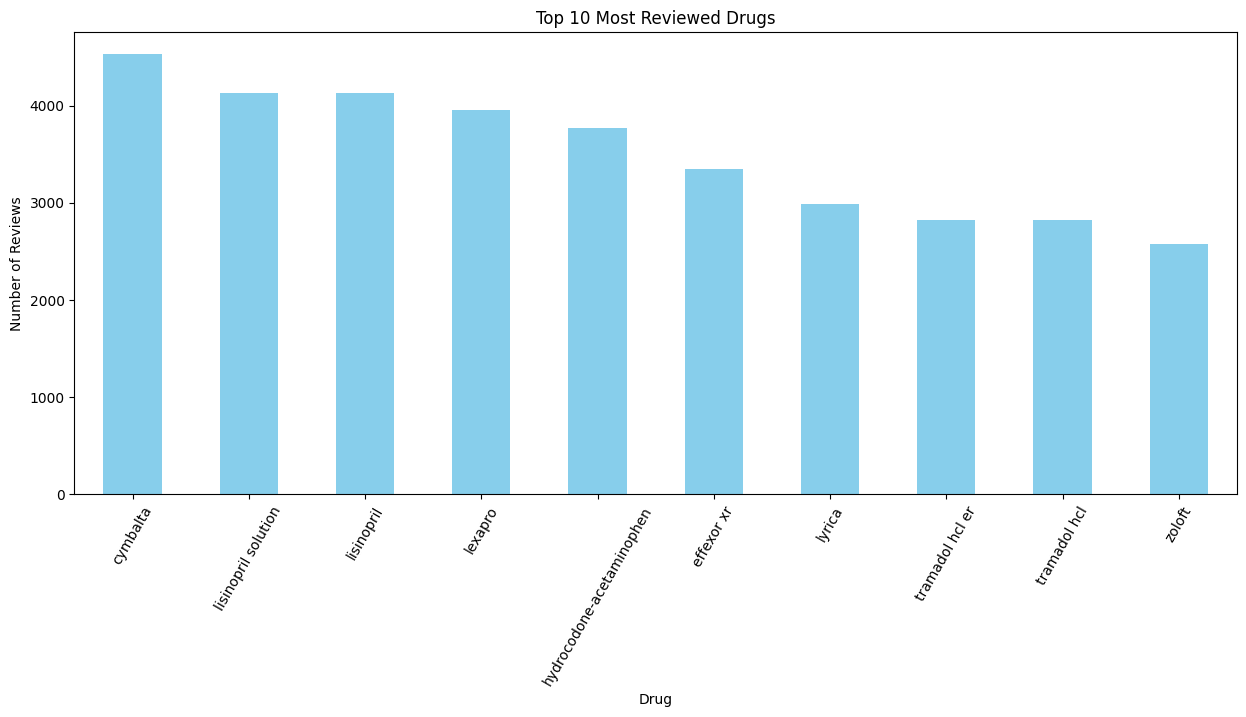

In [ ]:
# Top 10 most reviewed drugs
top_drugs = df_cleaned['Drug'].value_counts().head(10)
top_drugs.plot(kind='bar', figsize=(15, 6), color='skyblue')
plt.title('Top 10 Most Reviewed Drugs')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=60)
plt.show()


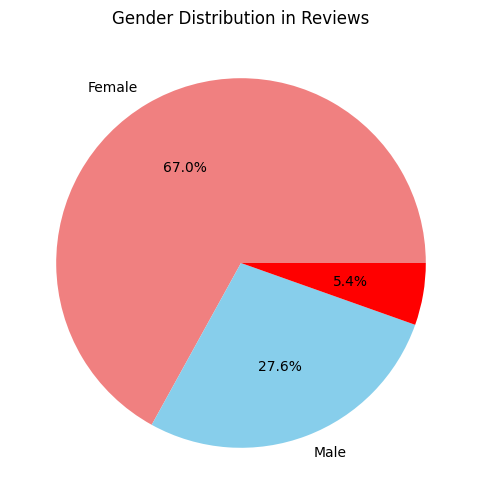

In [ ]:
# Gender distribution in reviews
gender_distribution = df_cleaned['Sex'].value_counts()
gender_distribution.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), colors=['lightcoral', 'skyblue', 'red'])
plt.title('Gender Distribution in Reviews')
plt.ylabel('')
plt.show()

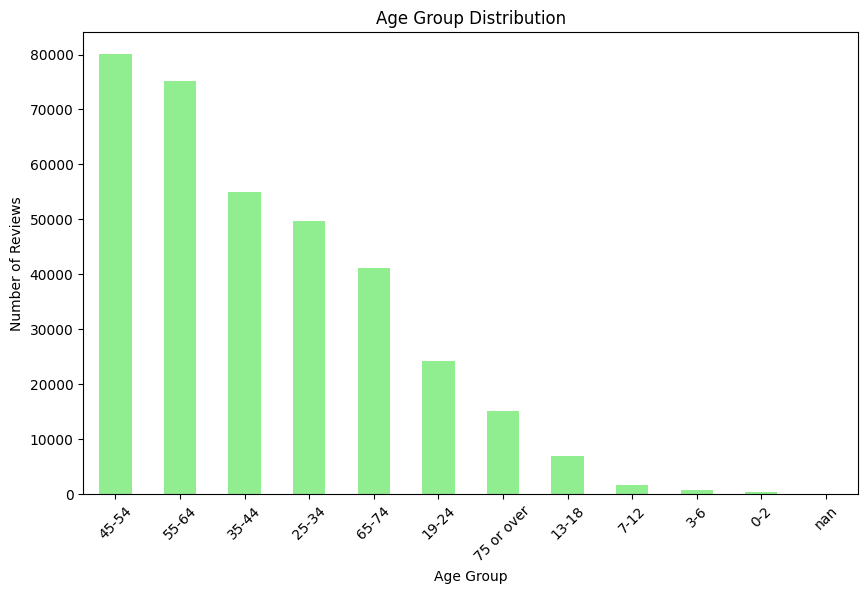

In [ ]:
# Age group analysis
age_distribution = df_cleaned['Age'].value_counts()
age_distribution.plot(kind='bar', figsize=(10, 6), color='lightgreen')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

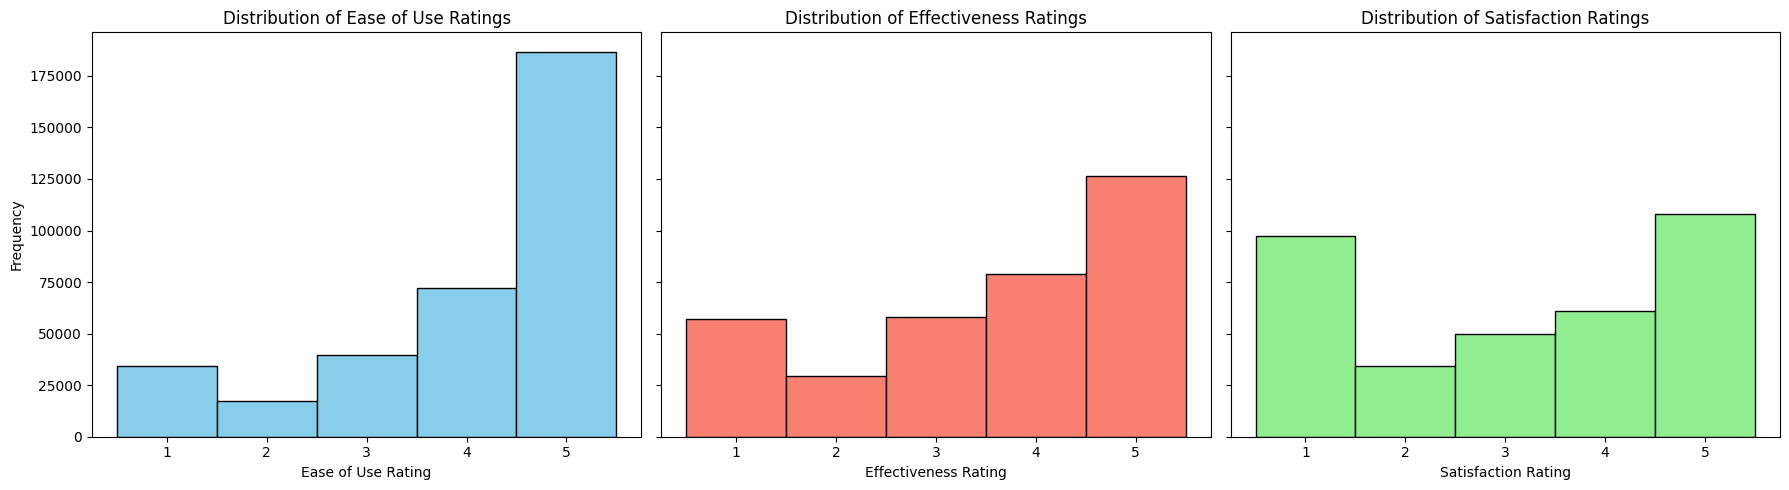

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

bins = [1, 2, 3, 4, 5, 6]

# Plot the distribution of EaseofUse
axes[0].hist(df_cleaned['EaseofUse'].dropna(), bins=bins, color='skyblue', edgecolor='black', align='left')
axes[0].set_title('Distribution of Ease of Use Ratings')
axes[0].set_xlabel('Ease of Use Rating')
axes[0].set_ylabel('Frequency')

# Plot the distribution of Effectiveness
axes[1].hist(df_cleaned['Effectiveness'].dropna(), bins=bins, color='salmon', edgecolor='black', align='left')
axes[1].set_title('Distribution of Effectiveness Ratings')
axes[1].set_xlabel('Effectiveness Rating')

# Plot the distribution of Satisfaction
axes[2].hist(df_cleaned['Satisfaction'].dropna(), bins=bins, color='lightgreen', edgecolor='black', align='left')
axes[2].set_title('Distribution of Satisfaction Ratings')
axes[2].set_xlabel('Satisfaction Rating')

plt.tight_layout()
plt.show()


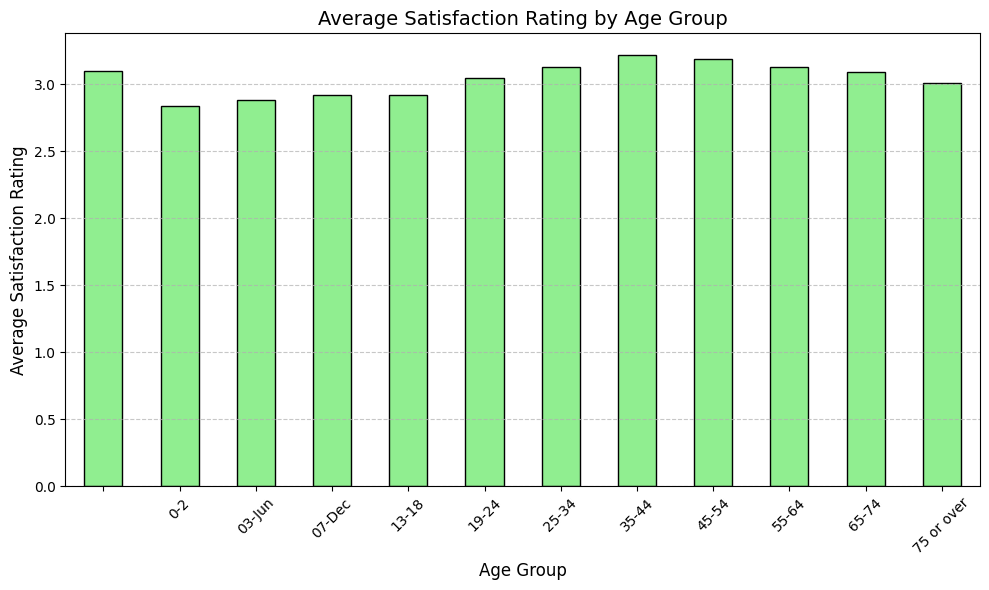

In [ ]:
filtered_data = data.dropna(subset=['Age'])

age_group_satisfaction = filtered_data.groupby('Age')['Satisfaction'].mean().sort_index()

plt.figure(figsize=(10, 6))
age_group_satisfaction.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Average Satisfaction Rating by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Satisfaction Rating', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


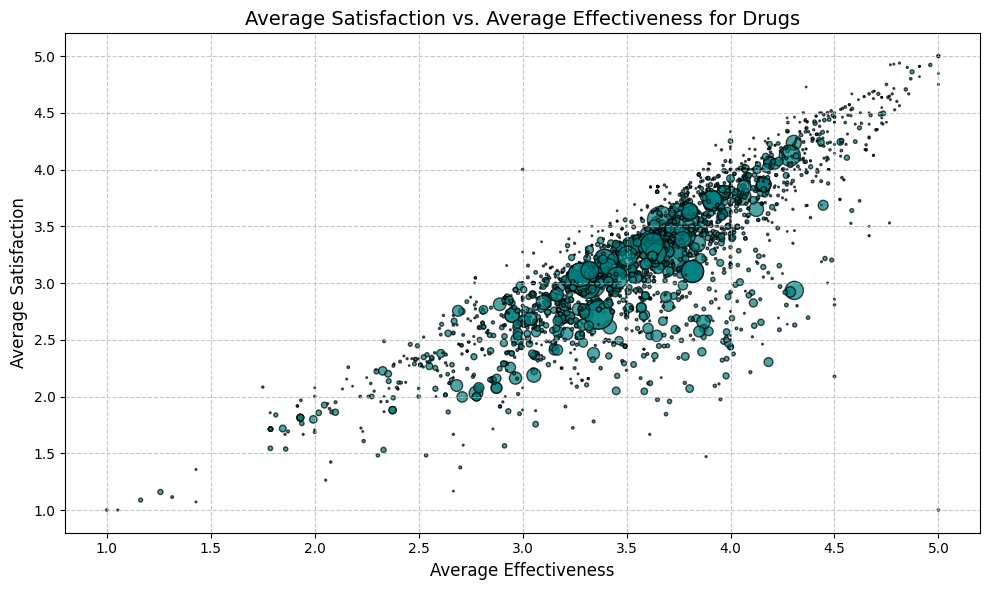

In [ ]:
# Scatter Plot: Average Satisfaction vs. Average Effectiveness
drug_analysis = df_cleaned.groupby('Drug').agg(
    Average_Satisfaction=('Satisfaction', 'mean'),
    Average_Effectiveness=('Effectiveness', 'mean'),
    Review_Count=('Reviews', 'count')
)

drug_analysis = drug_analysis[drug_analysis['Review_Count'] > 10]

plt.figure(figsize=(10, 6))
plt.scatter(
    drug_analysis['Average_Effectiveness'],
    drug_analysis['Average_Satisfaction'],
    s=drug_analysis['Review_Count'] / 10,  # Scale point size by review count
    alpha=0.7,
    color='teal',
    edgecolor='black'
)
plt.title('Average Satisfaction vs. Average Effectiveness for Drugs', fontsize=14)
plt.xlabel('Average Effectiveness', fontsize=12)
plt.ylabel('Average Satisfaction', fontsize=12)
plt.grid(alpha=0.7, linestyle='--')
plt.tight_layout()
plt.show()


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

import nltk
nltk.download('vader_lexicon')

# Initialize the VADER Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

df_cleaned['Sentiment'] = df_cleaned['Reviews'].dropna().apply(lambda x: sia.polarity_scores(x)['compound'])

# Categorize sentiments into Positive, Negative, and Neutral
def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df_cleaned['Sentiment_Category'] = df_cleaned['Sentiment'].apply(categorize_sentiment)

print(df_cleaned[['Reviews', 'Sentiment', 'Sentiment_Category']].head())


sentiment_distribution = df_cleaned['Sentiment_Category'].value_counts()
print("\nSentiment Distribution:\n", sentiment_distribution)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\luiki\AppData\Roaming\nltk_data...


                                             Reviews  Sentiment  \
0  I'm a retired physician and of all the meds I ...     0.0891   
1  cleared me right up even with my throat hurtin...    -0.3182   
2  why did my PTINR go from a normal of 2.5 to ov...     0.0000   
3                       FALLING AND DON'T REALISE IT    -0.1531   
4  My grandfather was prescribed this medication ...    -0.3818   

  Sentiment_Category  
0           Positive  
1           Negative  
2            Neutral  
3           Negative  
4           Negative  

Sentiment Distribution:
 Sentiment_Category
Negative    168988
Positive    112064
Neutral      69554
Name: count, dtype: int64


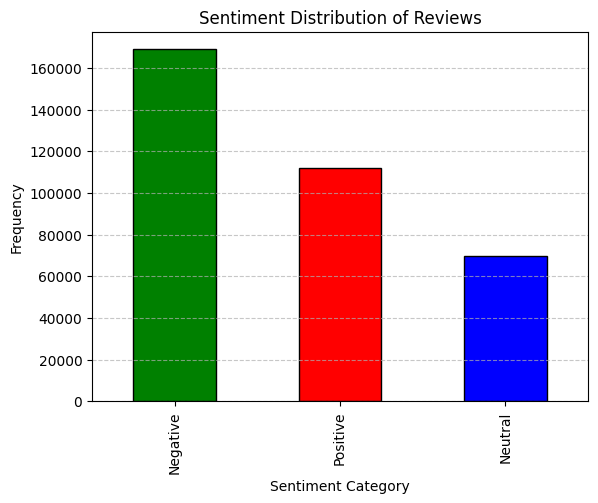

In [72]:
sentiment_distribution.plot(kind='bar', color=['green', 'red', 'blue'], edgecolor='black')
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
